# Geodata Preparation

In [22]:
import pandas as pd, geopandas as gpd, numpy as np
import mapclassify

In [2]:
stadtteile = gpd.read_file("../assets/geodata/stadtteile.geojson")

<AxesSubplot:>

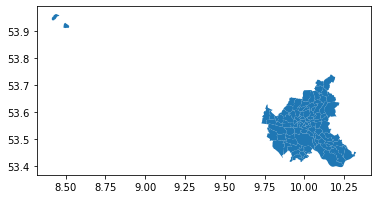

In [5]:
stadtteile.plot()

In [2]:
print("Hello")

Hello


In [3]:
stadtteilprofile = pd.read_excel("../assets/data/Stadtteilprofile2021.xlsx", header = 1, index_col = 0)

In [4]:
stadtteilprofile.columns

Index(['Bevölkerung', 'Unter 18-Jährige', 'Anteil der unter 18-Jährigen in %',
       ' 65-Jährige und Ältere', 'Anteil der 65-Jährigen und Älteren in %',
       'Ausländer:innen', 'Anteil der Ausländer:innen in %',
       'Bevölkerung mit Migrations-hintergrund',
       'Anteil der Bevölkerung mit Migrations-hintergrund in %',
       'Unter 18-Jährige mit Migrations-hintergrund',
       'Anteil der unter 18-Jährigen mit Migrations-hintergrund in %',
       'Haushalte', 'Personen je Haushalt', 'Einpersonen-haushalte',
       'Anteil der Einpersonen-haushalte in %', 'Haushalte mit Kindern',
       'Anteil der Haushalte mit Kindern in %', 'Alleinerziehende',
       'Anteil der Haushalte von Alleinerziehenden in %', 'Fläche in km²',
       'Bevölkerungs-dichte', 'Geburten', 'Sterbefälle', 'Zuzüge', 'Fortzüge',
       'Wanderungssaldo',
       'Sozial-versicherungs-pflichtig Beschäftigte (Dez 2020)',
       'Beschäftigten-quote in % (Dez 2020)', 'Arbeitslose (Dez 2020)',
       'Arbeitslos

In [5]:
stadtteile = stadtteile.set_index("stadtteil_name")

In [42]:
stadtteile.loc["Winterhude"]

/opt/miniconda3/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/opt/miniconda3/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/opt/miniconda3/lib/python3.9/site-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/opt/miniconda3/lib/python3.9/site-packages/pandas/i

id                                                      APP_STADTTEILE_47
stadtteil_schluessel                                                02405
bezirk                                                                  4
bezirk_name                                                  Hamburg-Nord
stadtteil_nummer                                                      405
geometry                (POLYGON ((10.033133116297526 53.5891100346961...
Name: Winterhude, dtype: object

In [46]:
stadtteile_einkuenfte = pd.read_csv("../assets/data/Stadtteil_Einkünfte.csv", sep=";", index_col="Bezirk Stadtteil Land" )
stadtteile_einkuenfte["Gesamtbetrag der Einkünfte (Mittelwert)"] = pd.to_numeric(stadtteile_einkuenfte["Gesamtbetrag der Einkünfte (Mittelwert)"], errors="coerce")
stadtteile_einkuenfte["Gesamtbetrag der Einkünfte (Median)"] = pd.to_numeric(stadtteile_einkuenfte["Gesamtbetrag der Einkünfte (Median)"], errors="coerce")

#stadtteile_einkuenfte

In [47]:
stadtteile_einkuenfte.dtypes

Gesamtbetrag d Einkünfte (1000€)                                    int64
Festgesetzte Einkommensteuer/Jahreslohnsteuer (Steuerpflichtige)    int64
Festgesetzte Einkommensteuer/Jahreslohnsteuer (1000 Euro)           int64
Gesamtbetrag der Einkünfte (Mittelwert)                             int64
Gesamtbetrag der Einkünfte (Median)                                 int64
dtype: object

In [37]:
apd.set_option('display.max_rows', None)
print(stadtteile_einkuenfte["Gesamtbetrag der Einkünfte (Median)"])

Bezirk Stadtteil Land
Bezirk Hamburg-Mitte                                              18808.0
Hamburg-Altstadt                                                  10811.0
HafenCity                                                         57913.0
Neustadt                                                          24715.0
St. Pauli                                                         19399.0
St. Georg                                                         27161.0
Hammerbrook                                                       10502.0
Borgfelde                                                         21584.0
Hamm                                                              21932.0
Horn                                                              18299.0
Billstedt                                                         17396.0
Billbrook                                                         10281.0
Rothenburgsort                                                    15460.0
Veddel          

In [43]:
stadtteile_einkuenfte["Gesamtbetrag der Einkünfte (Median)"].loc["Winterhude"]

nan

In [49]:
stadtteile_einkuenfte = stadtteile.merge(stadtteile_einkuenfte, left_index=True, right_index=True)

<AxesSubplot:>

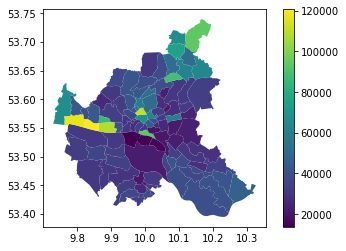

In [50]:
stadtteile_einkuenfte.plot(column = "Gesamtbetrag der Einkünfte (Mittelwert)", legend= True)

In [14]:
stadtteile_einkuenfte = stadtteile_einkuenfte.to_crs(epsg=4326)

In [54]:
stadtteile_einkuenfte.to_file("../assets/geodata/Einkommen.geojson", driver="GeoJSON")

In [16]:
einkünfte = gpd.read_file("../assets/geodata/Einkommen.geojson")

In [52]:
einkünfte["Gesamtbetrag der Einkünfte (Mittelwert)"].describe()

count        94.000000
mean      41365.563830
std       20831.220254
min       15831.000000
25%       30242.750000
50%       34785.000000
75%       42622.750000
max      120716.000000
Name: Gesamtbetrag der Einkünfte (Mittelwert), dtype: float64

In [53]:
mapclassify.Quantiles(einkünfte["Gesamtbetrag der Einkünfte (Mittelwert)"], k=6)

Quantiles                   

      Interval         Count
----------------------------
[     nan, 27539.67] |    32
(27539.67, 31195.00] |    16
(31195.00, 35049.00] |    16
(35049.00, 40564.00] |    15
(40564.00, 54430.00] |    16
(54430.00,      nan] |     0

In [29]:
einkünfte["Gesamtbetrag der Einkünfte (Median)"].isnull().count()

95

In [59]:
stadtteile_einkuenfte[stadtteile_einkuenfte["stadtteil_nummer"] == "408"].to_file("../assets/geodata/barmbek-sued.geojson", driver="GeoJSON")